# Top 10 Most Mentioned Medical Products

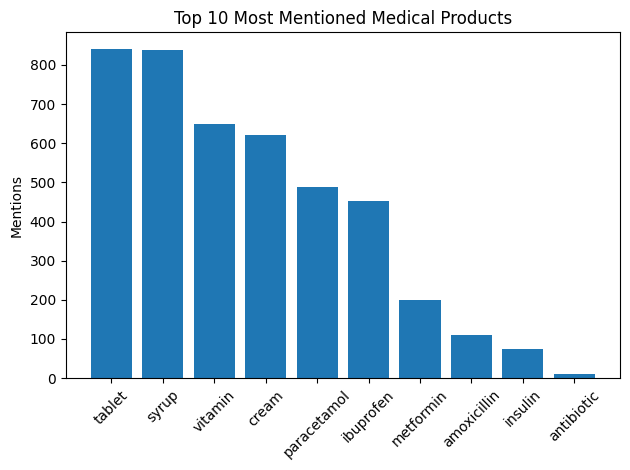

In [4]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import glob

# Example: List of keywords to search for (replace with your actual product list)
keywords = ['paracetamol', 'amoxicillin', 'ibuprofen', 'vitamin', 'insulin', 'metformin', 'antibiotic', 'cream', 'syrup', 'tablet']

counter = Counter()
for file in glob.glob('../data/raw/telegram_messages/*/*/messages.json'):
    with open(file, encoding='utf-8') as f:
        messages = json.load(f)
        for msg in messages:
            text = msg.get('message', '').lower()
            for kw in keywords:
                if kw in text:
                    counter[kw] += 1

top10 = counter.most_common(10)
labels, values = zip(*top10)
plt.bar(labels, values)
plt.title('Top 10 Most Mentioned Medical Products')
plt.ylabel('Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Media Types 

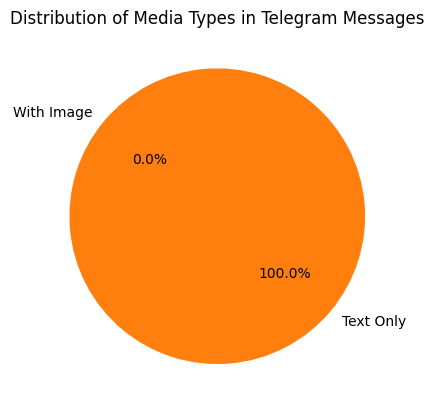

In [ ]:
import json
import glob
import matplotlib.pyplot as plt

# Since images are stored separately, all messages in messages.json are text-only.
image_count = 0
text_only_count = 0

for file in glob.glob('../data/raw/telegram_messages/*/*/messages.json'):
    with open(file, encoding='utf-8') as f:
        messages = json.load(f)
        text_only_count += len(messages)

labels = ['With Image', 'Text Only']
sizes = [image_count, text_only_count]

if sum(sizes) == 0:
    print("No messages found to visualize.")
else:
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Media Types in Telegram Messages')
    plt.show()